In [1]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import os
import matplotlib.pyplot as plt
import subprocess
import sympy as sym
import math
import scipy 
from scipy.optimize import curve_fit as cfit

# Parcial 1: Métodos Computacionales
### Estudiantes: Andrés Hernández (201329363)    Francisco Díaz (201912252)

 ## 2. Integration 

In [2]:
#Definimos Los polinomios de integración para una partición arbitraria.

PolyFunction = lambda x: (x-X[0])*(x-X[1])*(x-X[2])*(x-X[3])

x = sym.Symbol('x')
h = sym.Symbol('h')
integral = sym.integrate((x)*(x-h)*(x-2*h)*(x-3*h), (x,0,3*h))
y = sym.Symbol('y',real=True)

y = integral / math.factorial(4)

print (y)

-3*h**5/80


Note que este es el coeficiente que acompaña a $f^{(4)}(\epsilon)$ en la definición del error en la regla de Simpson $3/8$.

## 3. Integración 

1) Gauss-Laguerre Integration

In [3]:
def Derivada(f,x,h):
    d=0.
    
    if(h!=0):
        
        d= (f(x+h)-f(x-h))/(2*h)
    return d

#Definimos el método de NewtonRaphson

def NewtonMethod(f,df,xn, error, it, precision = 0.0001, iterations=1000):
    
    h_= 1.0e-7
    
    while error > precision and it < iterations:
        
        try:
            xn1 = xn - f(xn)/df(f,xn,h_)
            error = np.abs((xn1-xn)/xn1)
            
        except ZeroDivisionError:
            print("Hay división por cero.")
            
            
        xn = xn1
        
        it = it +1   
    return xn1

#Definimos la función que encuentra las raíces sin repetición

def polyRoots(f_,x_):
    roots =[]
    for i in x_:
        root = NewtonMethod(f_, Derivada,i, 1000,0)
        root = round(root,  5)
        if ((root in roots) == False):
            roots.append(root)
            
    return np.sort(roots)


In [4]:
#Definimos nuestra función original y el cambio de variable

Fx = lambda x: ((x**3)*np.exp(x))/(np.exp(x)-1)

#Definimos la función de integración Gaussiana.

def GaussianIntegration(f,  n):
    x = sym.Symbol('x',Real=True)
    LN1 =sym.polys.orthopolys.laguerre_poly(n+1,x)
    LN =  sym.polys.orthopolys.laguerre_poly(n,x)
    Xtest = np.linspace(0,n+1+((n**2 -n)/np.sqrt(n)),5000)
    
    FunctionN =sym.lambdify([x],LN,'numpy')  
    FunctionN1 =sym.lambdify([x],LN1,'numpy') 
    LRoots = np.sort(polyRoots(FunctionN, Xtest)) 
    pondeW = []
    i = 0 
    while i < n:
        w = LRoots[i]/(((n+1)**2)*((FunctionN1(LRoots[i]))**2 ))
        pondeW.append(w)
        i+=1
    i=0
    sum = 0

    while i < n:
        sum += pondeW[i] * f(LRoots[i])
        i+=1
    
    return sum

#Calculamos e imprimimos nuestro valor de interes.
NGrad = 3
integral = GaussianIntegration(Fx,NGrad)
print(integral , (np.pi**4)/15)

6.481132464522558 6.493939402266828


b) Estimando los errores en función de $n$.

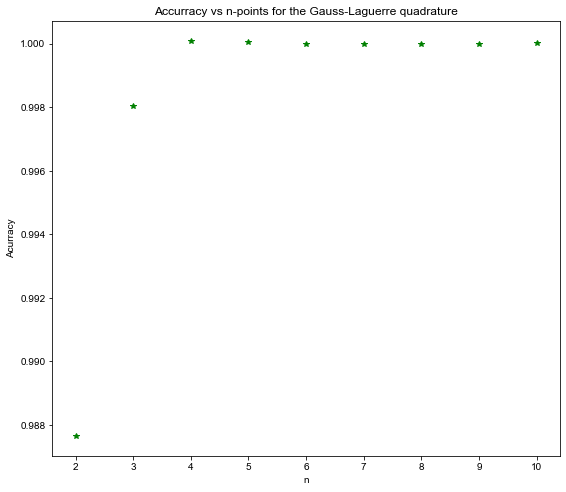

In [5]:
def errorLaguerre(n):
    errors = []
    real = (np.pi**4)/15
    i=2
    while i <=n:
        estimated= GaussianIntegration(Fx,i)
        error = estimated/real
        errors.append(error)
        i+=1
    return errors
NPoints = np.linspace(2,10,9)
Errores = errorLaguerre(float(NPoints[-1]))
fig = plt.figure(figsize=(20,8))
ax1=fig.add_subplot(121)
ax1.plot(NPoints, Errores,'g*' )

ax1.set(xlabel='n',ylabel = 'Acurracy')

plt.title('Accurracy vs n-points for the Gauss-Laguerre quadrature')
plt.style.use('seaborn-whitegrid')
